In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
N = 100
D = np.random.normal(0,1,N)

#### 1. bootstrapping by selecting random halves of the data

In [13]:
Dcopy = np.copy(D)
np.random.seed(10)
n_iter = 1000
std1 = np.empty(n_iter*2)

for i in range(n_iter):
    np.random.shuffle(Dcopy)
    std1[i] = np.std(Dcopy[:int(N/2)])
    std1[i+n_iter]=np.std(Dcopy[int(N/2):])

#### 2. bootstrapping by resampling (e.g., 1000 times) with replacement from the full dataset.
What is the sample size?

In [14]:
np.random.seed(10)
n_iter = 1000
sample_size = 500
std2 = np.empty(n_iter)

for i in range(n_iter):
    subD = np.random.choice(D, size = sample_size, replace = True)
    std2[i] = np.std(subD)

#### 3. Jackknife estimate

In [15]:
idx = np.arange(N)
s = np.std(D)
se3 = np.sum([(np.std(D[idx!=i])-s)**2 for i in range(N)])*(N-1)/N
std3 = np.array([np.std(D[idx!=i]) for i in range(N)])

(0, 4)

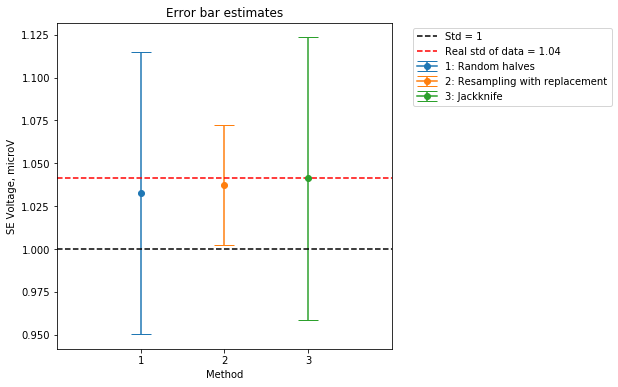

In [31]:
plt.figure(figsize = (6,6))
plt.title('Error bar estimates')
plt.errorbar(1, y = np.mean(std1), yerr = np.std(std1), capsize = 10, marker = 'o', label = '1: Random halves')
plt.errorbar(2, y = np.mean(std2), yerr = np.std(std2), capsize = 10, marker = 'o', label = '2: Resampling with replacement')
plt.errorbar(3, y = np.mean(std3), yerr = np.sqrt(se3), capsize = 10, marker = 'o', label = '3: Jackknife')
plt.hlines(1, 0, 4, linestyles='--', label = 'Std = 1')
plt.hlines(np.std(D), 0, 4, linestyles='--', label = 'Real std of data = {:.2f}'.format(np.std(D))
           , color = 'red')
plt.xticks([1,2,3], label = [1,2,3])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Method')
plt.ylabel('SE Voltage, microV')
plt.xlim(0,4)